### This is the simple workflow with graph

In [4]:
def function1(input1):
    return input1 + " from main function"

def function2(input2):
    return input2 + " and kumar from second function"

In [32]:
# Showing this later on, for Better Understanding.

def function3(input3):
    return input3

In [33]:
def function1(input1):
    return input1 + " from first function"

def function2(input2):
    output=function3("this is function 3 in between")
    return input2 + " " + output + " and Kumar from second function"

In [34]:
from langgraph.graph import Graph

In [35]:
workflow1=Graph()

In [36]:
workflow1.add_node("function1", function1)

In [37]:
workflow1.add_node("function2",function2)

In [38]:
workflow1.add_edge("function1","function2")

In [39]:
workflow1.set_entry_point("function1")

In [40]:
workflow1.set_finish_point("function2")

In [41]:
app1=workflow1.compile()

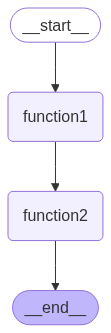

In [42]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [43]:
app1.invoke("hi This is Vasudeva")

'hi This is Vasudeva from first function this is function 3 in between and Kumar from second function'

In [15]:
input="Hi This is Vasudeva"

In [44]:
for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from function1
_______
Hi This is vasudeva from first function


here is output from function2
_______
Hi This is vasudeva from first function this is function 3 in between and Kumar from second function




# Now lets create workflow with llm

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGSMITH_API_KEY=os.getenv("LANGSMITH_API_KEY")
LANGSMITH_PROJECT=os.getenv("LANGSMITH_PROJECT")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"]= GROQ_API_KEY
os.environ["LANGSMITH_API_KEY"] = LANGSMITH_API_KEY
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGSMITH_PROJECT"]=LANGSMITH_PROJECT

# Here is an OpenAI LLM calling, for Example.

In [12]:
import os
from dotenv import load_dotenv
load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [ ]:
from langchain_openai import ChatOpenAI

# Initialize the LLM with your OpenAI API key (make sure OPENAI_API_KEY is set in your environment)
llm = ChatOpenAI(model="gpt-3.5-turbo")  # or "gpt-4o", "gpt-4", etc.

# Call the LLM with a prompt
response = llm.invoke("What is the capital of France?")
print(response.content)

The capital of France is Paris.


# Here is an Google GenAi LLM calling, precedding with google genai api in futher steps of the workflow.

In [2]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm= ChatGoogleGenerativeAI(model="gemini-2.0-flash")

d:\langgraph-end-to-end\langgraphvenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from google.generativeai import list_models
import os

os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")

models = list_models()
for model in models:
    print(model.name)

models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-pro-preview-05-06
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview

In [15]:
from langchain_google_genai import ChatGoogleGenerativeAI

try:
    llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")
    response = llm.invoke("Hello! Is my API key valid?")
    print(response.content)
except Exception as e:
    print("API key error or quota exceeded:", e)

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised NotFound: 404 models/gemini-1.0-pro is not found for API version v1beta, or is not supported for generateContent. Call ListModels to see the list of available models and their supported methods..


API key error or quota exceeded: 404 models/gemini-1.0-pro is not found for API version v1beta, or is not supported for generateContent. Call ListModels to see the list of available models and their supported methods.


# Here is an Groq, LLM calling,for example.

You can use any of these LLM's in you workflow based on the avaliablity of your API Key.

In [5]:
'''from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")'''
from langchain_groq import ChatGroq
import os
llm=ChatGroq(model_name="Gemma2-9b-It")

In [3]:
llm.invoke("hi").content

'Hi there! How can I help you today?'

In [ ]:
def function1(input):
    # llm = ChatOpenAI(model="gpt-3.5-turbo")
    # llm = ChatGroq(model_name="Gemma2-9b-It")
    llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
    response=llm.invoke(input).content
    return response

In [6]:
def function2(input):
    upper_case=input.upper()
    return upper_case

In [7]:
from langgraph.graph import Graph
workflow2=Graph()

In [8]:
workflow2.add_node("llm",function1)

In [9]:
workflow2.add_node("upper_string",function2)

In [10]:
workflow2.add_edge("llm","upper_string")

In [11]:
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [12]:
app2=workflow2.compile()

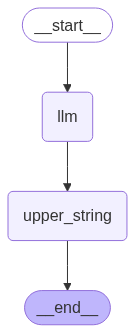

In [13]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [14]:
app2.invoke("what is a name of first indian prime minister?")

'THE FIRST PRIME MINISTER OF INDIA WAS **JAWAHARLAL NEHRU**.'

In [15]:
print(app2.invoke("what is genai explain in detail?"))

OKAY, LET'S BREAK DOWN GENAI, OR GENERATIVE AI, IN DETAIL.

**WHAT IS GENERATIVE AI?**

GENERATIVE AI (GENAI) REFERS TO A CATEGORY OF ARTIFICIAL INTELLIGENCE ALGORITHMS THAT ARE TRAINED TO **GENERATE NEW CONTENT** BASED ON THE DATA THEY HAVE LEARNED FROM.  INSTEAD OF SIMPLY ANALYZING OR CLASSIFYING EXISTING DATA, GENAI MODELS CREATE *ORIGINAL* OUTPUTS THAT RESEMBLE THE DATA THEY WERE TRAINED ON. THINK OF IT LIKE A STUDENT WHO HAS LEARNED A SUBJECT SO WELL THAT THEY CAN NOW CREATE THEIR OWN ORIGINAL WORKS BASED ON THAT KNOWLEDGE.

**KEY CHARACTERISTICS OF GENERATIVE AI:**

*   **GENERATION:** THE CORE FUNCTION IS TO PRODUCE NEW, ORIGINAL CONTENT. THIS CAN INCLUDE TEXT, IMAGES, AUDIO, VIDEO, CODE, OR EVEN 3D MODELS.
*   **LEARNING FROM DATA:** GENAI MODELS ARE TRAINED ON LARGE DATASETS. THE QUALITY AND DIVERSITY OF THE TRAINING DATA SIGNIFICANTLY IMPACT THE QUALITY AND CHARACTERISTICS OF THE GENERATED OUTPUT.
*   **PROBABILISTIC NATURE:**  GENAI MODELS DON'T JUST MEMORIZE THE TRAINING DA

In [16]:
input="what is a name of first indian prime minister?"

In [17]:
for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
The first Prime Minister of India was Jawaharlal Nehru.


here is output from upper_string
_______
THE FIRST PRIME MINISTER OF INDIA WAS JAWAHARLAL NEHRU.




Here lets create our own output token counter

In [18]:
def function3(input):
    token=input.split()
    token_number=len(token)
    token_number=f"total token number is {token_number}"
    return token_number

In [21]:
workflow3=Graph()
workflow3.add_node("llm",function1)
workflow3.add_node("token_counter",function3)
workflow3.add_edge("llm","token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app3=workflow3.compile()

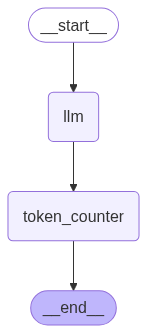

In [20]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [22]:
app3.invoke("what is a name of first indian prime minister?")

'total token number is 9'

In [23]:
app3.invoke("what is genai explain in detail?")

'total token number is 1289'

In [24]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'title': 'What is LangGraph? - IBM',
  'url': 'https://www.ibm.com/think/topics/langgraph',
  'content': 'Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example,to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.',
  'score': 0.92491204},
 {'title': 'Next LangGraph Glossary - Overview',
  'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/',
  'content': 'In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id).\nSimilar to NetworkX, you add these nodes to a graph using the add_node method:\n[](https://langchain-ai.github.io/langgraph/concepts/lo

### Question: Can we integrating a RAG Pipeline?

### Answer: yes we can!

In [25]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [28]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [29]:
llm.invoke("hi").content

'Hi there! How can I help you today?'

In [30]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [31]:
loader=DirectoryLoader("../data",glob="./*.txt",loader_cls=TextLoader)
docs=loader.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

In [32]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

In [33]:
query = "what is meta llama3?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

C:\Users\swaro\AppData\Local\Temp\ipykernel_6340\1985905.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


{'source': '..\\data\\llama3.txt'}
Alongside the release of Llama 3, Meta added virtual assistant features to Facebook and WhatsApp in
page_content='Alongside the release of Llama 3, Meta added virtual assistant features to Facebook and WhatsApp in' metadata={'source': '..\\data\\llama3.txt'}
page_content='by Meta AI starting in February 2023.[2][3] The latest version is Llama 3 released in April' metadata={'source': '..\\data\\llama3.txt'}
page_content='Llama 2, Meta AI started releasing instruction fine-tuned versions alongside foundation models.[7]' metadata={'source': '..\\data\\llama3.txt'}


In [34]:
def function_1(AgentState):
    
    message=AgentState["messages"]
    
    question=message[-1]
    
    complete_prompt="Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content) # appending LLM call response to the AgentState
    
    #print(AgentState)
    
    return AgentState

In [35]:
AgentState={}

In [36]:
AgentState["messages"]=[]

In [37]:
AgentState

{'messages': []}

In [38]:
AgentState["messages"].append("hi, how are you?")

In [39]:
AgentState

{'messages': ['hi, how are you?']}

In [40]:
AgentState["messages"].append("hi, what you doing?")

In [41]:
AgentState

{'messages': ['hi, how are you?', 'hi, what you doing?']}

In [42]:
def function_2(AgentState):
    messages = AgentState['messages']
    question = messages[0] ## Fetching the user question

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result

In [43]:
# Define a Langchain graph
from langgraph.graph import Graph
workflow4 = Graph()
workflow4.add_node("LLM", function_1)
workflow4.add_node("RAGtool", function_2)
workflow4.add_edge('LLM', 'RAGtool')
workflow4.set_entry_point("LLM")
workflow4.set_finish_point("RAGtool")
app4 = workflow4.compile()

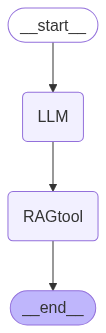

In [44]:
from IPython.display import Image, display

try:
    display(Image(app4.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [45]:
inputs = {"messages": ["Tell me about llama3 model"]}

In [46]:
for output in app4.stream(inputs):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'LLM':
---
{'messages': ['Tell me about llama3 model', 'Llama 3 is a family of large language models released by Meta, known for strong performance and open availability.']}

---

Output from node 'RAGtool':
---
The 8B parameter version of Llama 3 is described as "surprisingly capable" given its size. Llama models have been compared favorably against other large language models.

---



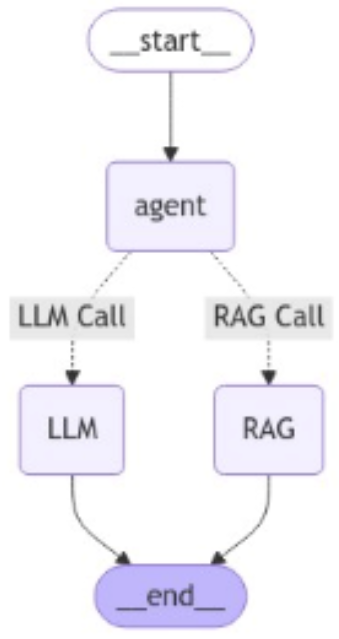

In [50]:
loader2=DirectoryLoader("../data2",glob="./*.txt",loader_cls=TextLoader)
docs2=loader2.load()

text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs2 = text_splitter.split_documents(documents=docs2)
doc_strings2 = [doc.page_content for doc in new_docs2]

In [51]:
db2 = Chroma.from_documents(new_docs2, embeddings)
retriever2 = db2.as_retriever(search_kwargs={"k": 3})

In [52]:
query = "Tell me about India's Industrial Growth?"
docs = retriever2.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

{'source': '..\\data2\\indian_economy.txt'}
India’s industrial growth has outpaced expectations, raising hopes that the economy will avoid a
page_content='India’s industrial growth has outpaced expectations, raising hopes that the economy will avoid a' metadata={'source': '..\\data2\\indian_economy.txt'}
page_content='India’s industrial growth has outpaced expectations, raising hopes that the economy will avoid a' metadata={'source': '..\\data2\\indian_economy.txt'}
page_content='India’s strong export sectors—including textiles, IT services, and automotive manufacturing—had' metadata={'source': '..\\data2\\indian_economy.txt'}


1. TypedDict:
- TypedDict is a special type that allows you to define a dictionary in Python where each key has a specific type.
It’s useful when you want to enforce type checks on the keys and values of a dictionary.

2. Annotated:
- Annotated is used to add metadata or constraints to a type.
It’s typically used for adding additional information, like constraints or descriptions, to the type.

3. Sequence[BaseMessage]:
- Sequence is a generic type from Python's typing module that represents a list-like structure (such as a list or tuple) where the order matters, and you can access elements by their position.

4. BaseMessage:
- Basemessage: This assumes you're working with the LangChain framework, and BaseMessage is part of its core messaging system. It is typically used when handling or processing messages in LangChain's workflows

5. operator.add:

- operator.add is a function from Python’s operator module that performs addition (+) on its arguments.
In this context, operator.add is being used as metadata for the Annotated type, likely suggesting that the sequence of BaseMessage objects is meant to be "added" or concatenated with another sequence at some point. It’s an indicator of how the messages field will be treated in the logic of your program.


- **TopicSelectionParser:** A Pydantic model that defines two fields (Topic and Reasoning), both of which are required to be strings.
- **Field:** Adds metadata, like descriptions, and can also be used for validation and constraints.
- **Pydantic’s Role:** Ensures that the data matches the expected structure and types, raising validation errors if the data is invalid.

In [53]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
from langchain.prompts import PromptTemplate

In [54]:
class AgentState(TypedDict):
    # The 'messages' field should be a sequence of strings, and we annotate it with 'operator.add'
    # This implies we might want to "add" new messages to the sequence later
    messages: Annotated[Sequence[BaseMessage], operator.add]

### Putting It All Together:

- The line messages: Annotated[Sequence[BaseMessage], operator.add] defines a field messages that:

- Must be a sequence (like a list or tuple) of BaseMessage objects.
Has the additional annotation operator.add, which suggests that this sequence is intended to support addition (i.e., concatenation of multiple sequences of messages).

messages: Annotated[Sequence[BaseMessage], operator.add]

"messages": [BaseMessage("Hello!", "Alice"), BaseMessage("Hi!", "Bob")]

In [55]:
from pydantic import BaseModel , Field
class TopicSelectionParser(BaseModel):
    Topic: str = Field(description='Selected Topic')
    Reasoning: str = Field(description='Reasoning behind topic selection')

In [56]:
from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [ ]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```

In [57]:
def function_1(state):
    message=state["messages"]
    question=message[-1]
    print(question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [India, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt = PromptTemplate(template=template,
                                    input_variables=[question],
                                    partial_variables={
                                        "format_instructions" : parser.get_format_instructions()                                    }
                                    )
    chain =  prompt | llm | parser
    
    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })

    print(response)

    return {"messages": [response.Topic]}

In [ ]:
template="""
    Your task is to classify the given user query into one of the following categories: [India, Not Related]. 
    Only respond with the category name and nothing else.

    User query: "Tell me about India's Industrial Growth"
    The output should be formatted as a JSON instance that conforms to the JSON schema below.

    As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
    the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

    Here is the output schema:
    ```
    {"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
        """

template="""
    Your task is to classify the given user query into one of the following categories: [India, Not Related]. 
    Only respond with the category name and nothing else.

    User query: "Tell me about India's Industrial Growth"
    The output should be formatted as a JSON instance that conforms to the JSON schema below.

    As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
    the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

    Here is the output schema:
    ```
    {"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
        """

In [ ]:
state={"messages": ["Tell me about India's Industrial Growth"]}

In [ ]:
function_1(state)

Tell me about India's Industrial Growth
Topic='India' Reasoning="The user query is about India's Industrial Growth"


{'messages': ['India']}

In [58]:
def router(state):
    print('-> Router ->')
    
    messages = state["messages"]
    last_message = messages[-1]
    print(last_message)
    if 'India' in last_message:
        return 'RAG Call'
    else:
        return 'LLM Call'

In [59]:
def function_2(state):
    print('-> Calling RAG ->')
    messages = state['messages']
    question = messages[0] ## Fetching the user question
    print(question)

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)
    
    print(prompt)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return  {"messages": [result]}

In [60]:
def function_3(state):
    print('-> Calling LLM ->')

    messages = state['messages']
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = llm.invoke(complete_query)
    return {"messages": [response.content]}

In [65]:
AgentState

__main__.AgentState

In [61]:
from langgraph.graph import StateGraph,END

workflow5 = StateGraph(AgentState) ### StateGraph with AgentState


workflow5.add_node("agent", function_1)

workflow5.add_node("RAG", function_2)

workflow5.add_node("LLM", function_3)


workflow5.set_entry_point("agent")

workflow5.add_conditional_edges(
    "agent",
    
    
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

workflow5.add_edge("RAG",END)


workflow5.add_edge("LLM",END)


app5=workflow5.compile()

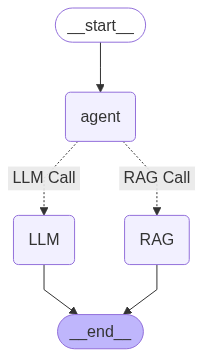

In [62]:
from IPython.display import Image, display

try:
    display(Image(app5.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [63]:
inputs = {"messages": ["Tell me about India's Industrial Growth"]}

In [64]:
output = app5.invoke(inputs)

Tell me about India's Industrial Growth
Topic='India' Reasoning="The query explicitly mentions 'India's Industrial Growth'."
-> Router ->
India
-> Calling RAG ->
Tell me about India's Industrial Growth
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [66]:
output

{'messages': ["Tell me about India's Industrial Growth",
  'India',
  "India's industrial growth has outpaced expectations, raising hopes that the economy will avoid a [unspecified negative outcome]."]}

In [67]:
inputs = {"messages": ["Tell me about first prime minister of india?"]}

In [68]:
output = app5.invoke(inputs)

Tell me about first prime minister of india?
Topic='India' Reasoning='The query is about the first prime minister of India.'
-> Router ->
India
-> Calling RAG ->
Tell me about first prime minister of india?
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [69]:
inputs = {"messages": ["who build the Taj Mahal?"]}

In [70]:
output = app5.invoke(inputs)

who build the Taj Mahal?
Topic='India' Reasoning='The Taj Mahal is located in India and is a significant part of its history and culture.'
-> Router ->
India
-> Calling RAG ->
who build the Taj Mahal?
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [71]:
output

{'messages': ['who build the Taj Mahal?',
  'India',
  'The provided text does not contain information about who built the Taj Mahal.']}

In [72]:
inputs = {"messages": ["who is a president of USA?"]}

In [73]:
output = app5.invoke(inputs)

who is a president of USA?
Topic='Not Related' Reasoning='The query is about the president of the USA, which is not related to India.'
-> Router ->
Not Related
-> Calling LLM ->


In [74]:
output

{'messages': ['who is a president of USA?',
  'Not Related',
  'The current president of the United States is **Joe Biden**.']}

In [75]:
import os
from dotenv import load_dotenv
load_dotenv()

GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGSMITH_API_KEY=os.getenv("LANGSMITH_API_KEY")
LANGSMITH_PROJECT=os.getenv("LANGSMITH_PROJECT")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"]= GROQ_API_KEY
os.environ["LANGSMITH_API_KEY"] = LANGSMITH_API_KEY
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGSMITH_PROJECT"]=LANGSMITH_PROJECT

In [76]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [ ]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [ ]:
'''
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")
llm.invoke("hi").content'''

'\nfrom langchain_google_genai import GoogleGenerativeAIEmbeddings\nembeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")\nfrom langchain_google_genai import ChatGoogleGenerativeAI\nllm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")\nllm.invoke("hi").content'

In [ ]:
import json
#from langchain_core.messages import ToolMessage
from langchain_core.tools import tool
from langchain_core.utils.function_calling import convert_to_openai_tool

In [ ]:
@tool
def multiply(first_number: int, second_number: int):
    """Multiplies two numbers together."""
    return first_number * second_number

In [ ]:
tools=[convert_to_openai_tool(multiply)]

In [ ]:
model_with_tools = llm.bind(tools=tools)

In [ ]:
response = model_with_tools.invoke('What is 35 * 46?')

In [ ]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_cvxk', 'function': {'arguments': '{"first_number":35,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 976, 'total_tokens': 1067, 'completion_time': 0.165454545, 'prompt_time': 0.031299254, 'queue_time': 0.004132151000000001, 'total_time': 0.196753799}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-830b1749-a982-4f18-a5ba-4bcf8b0455fa-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 35, 'second_number': 46}, 'id': 'call_cvxk', 'type': 'tool_call'}], usage_metadata={'input_tokens': 976, 'output_tokens': 91, 'total_tokens': 1067})

In [ ]:
tool_calls = response.additional_kwargs.get('tool_calls')

In [ ]:
tool_calls

[{'id': 'call_cvxk',
  'function': {'arguments': '{"first_number":35,"second_number":46}',
   'name': 'multiply'},
  'type': 'function'}]

In [ ]:
for tool_call in tool_calls:
    print('Function Name:',tool_call.get('function').get('name'))
    print('Function Arguments:',tool_call.get('function').get('arguments'))
    print(tool_call)

Function Name: multiply
Function Arguments: {"first_number":35,"second_number":46}
{'id': 'call_cvxk', 'function': {'arguments': '{"first_number":35,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}


In [ ]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage


In [ ]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [ ]:
def invoke_model(state):
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question
    return {"messages":[model_with_tools.invoke(question)]}

In [ ]:
input={"messages":["how much is 30*35?"]}

In [ ]:
invoke_model(input)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_qfgj', 'function': {'arguments': '{"first_number":30,"second_number":350}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 976, 'total_tokens': 1068, 'completion_time': 0.167272727, 'prompt_time': 0.039961988, 'queue_time': 0.0031899170000000004, 'total_time': 0.207234715}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ed554fac-f0ff-4dcc-99bf-68855a84def2-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 30, 'second_number': 350}, 'id': 'call_qfgj', 'type': 'tool_call'}], usage_metadata={'input_tokens': 976, 'output_tokens': 92, 'total_tokens': 1068})]}

In [ ]:
def invoke_tool(state):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    print(f"here is a tool_calls {tool_calls}")
    multiply_call = None

    for tool_call in tool_calls:
        if tool_call.get("function").get("name") == "multiply":
            multiply_call = tool_call

    if multiply_call is None:
        raise Exception("No adder input found.")

    res = multiply.invoke(
        json.loads(multiply_call.get("function").get("arguments"))
    )

    return {"messages" : [res]
    }

In [ ]:
from langgraph.graph import StateGraph,END
workflow6 = StateGraph(AgentState) ### StateGraph with AgentState
workflow6.add_node("agent", invoke_model)
workflow6.add_node("tool", invoke_tool)

In [ ]:

workflow6.add_edge("tool", END)
workflow6.set_entry_point("agent")

In [ ]:
def router(state):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    if len(tool_calls):
        return "multiply"
    else:
        return "end"

In [ ]:
workflow6.add_conditional_edges("agent",router,{"multiply": "tool","end": END})

In [ ]:
app6 = workflow6.compile()

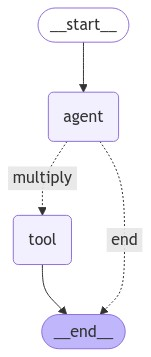

In [ ]:
from IPython.display import Image, display

try:
    display(Image(app6.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [ ]:
app6.invoke({"messages": ["What is LLM?"]})

here is a tool_calls [{'id': 'call_hjy5', 'function': {'arguments': '{"first_number":10,"second_number":5}', 'name': 'multiply'}, 'type': 'function'}]


{'messages': ['What is LLM?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_hjy5', 'function': {'arguments': '{"first_number":10,"second_number":5}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 189, 'prompt_tokens': 971, 'total_tokens': 1160, 'completion_time': 0.343636364, 'prompt_time': 0.031546433, 'queue_time': 0.0043375330000000045, 'total_time': 0.375182797}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-962c0569-a433-4b0f-b1ab-d266713b8f98-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 10, 'second_number': 5}, 'id': 'call_hjy5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 971, 'output_tokens': 189, 'total_tokens': 1160}),
  50]}

In [ ]:
app6.invoke({"messages": ["What is 123 * 456?"]})

here is a tool_calls [{'id': 'call_djhs', 'function': {'arguments': '{"first_number":123,"second_number":4456}', 'name': 'multiply'}, 'type': 'function'}]


{'messages': ['What is 123 * 456?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_djhs', 'function': {'arguments': '{"first_number":123,"second_number":4456}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 95, 'prompt_tokens': 978, 'total_tokens': 1073, 'completion_time': 0.172727273, 'prompt_time': 0.031384243, 'queue_time': 0.004106367, 'total_time': 0.204111516}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-45b88bbb-32d7-43c1-bf5b-d34d7cb7fb35-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 123, 'second_number': 4456}, 'id': 'call_djhs', 'type': 'tool_call'}], usage_metadata={'input_tokens': 978, 'output_tokens': 95, 'total_tokens': 1073}),
  548088]}

In [ ]:
for output in app6.stream({"messages": ["What is 123 * 456?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from agent
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_697g', 'function': {'arguments': '{"first_number":123,"second_number":4456}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 94, 'prompt_tokens': 978, 'total_tokens': 1072, 'completion_time': 0.170909091, 'prompt_time': 0.031686312, 'queue_time': 0.004383204000000002, 'total_time': 0.202595403}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-1c0aa786-ffa7-4f1c-92c3-b0cbeb63fc9a-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 123, 'second_number': 4456}, 'id': 'call_697g', 'type': 'tool_call'}], usage_metadata={'input_tokens': 978, 'output_tokens': 94, 'total_tokens': 1072})]}


here is a tool_calls [{'id': 'call_697g', 'function': {'arguments': '{"first_number":123,"second_number":4456}', 'name': 'multiply'}, 'type': 'function

In [ ]:
for output in app6.stream({"messages": ["what s LLM?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '<tool-use>\n{\n\t"tool_call": {\n\t\t"id": "pending",\n\t\t"type": "function",\n\t\t"function": {\n\t\t\t"name": "lookup"\n\t\t},\n\t\t"parameters": {\n\t\t\t"query": "LLM"\n\t\t}\n\t}\n}\n</tool-use> \n'}}

In [ ]:
mydict={"Vasudeva":["Vasudeva"]}

In [ ]:
mydict.get("Kumar",[])

[]